In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
from PerturbSeq_CMV.paths import DATA_DIR

In [152]:
DATA_DIR

PosixPath('/home/icb/alessandro.palma/PerturbSeq_CMV/project_folder/data')

In [153]:
folder = DATA_DIR / "rawdata" / "CRISPRi_screen_host_processed"

In [154]:
crispri_df_raw = pd.read_excel(folder / "CRISPR_host_factors.xlsx", header=0)

In [155]:
crispri_df_raw

,Unnamed: 0,t0,t0.1,surviving,surviving.1,uninfected,uninfected.1
0,NaN,raw counts,raw counts,raw counts,raw counts,raw counts,raw counts
1,sgId,Rep1,Rep2,Rep1,Rep2,Rep1,Rep2
2,A1BG_+_58858549.23-P1,293,490,293,226,860,576
3,A1BG_+_58858964.23-P1,350,486,883,590,1559,767
4,A1BG_+_58864367.23-P2,546,982,860,844,1193,1532
...,...,...,...,...,...,...,...
104532,non-targeting_01890,103,284,433,284,188,465
104533,non-targeting_01891,0,0,0,0,0,0
104534,non-targeting_01892,694,810,574,817,1848,1492
104535,non-targeting_01893,650,871,1068,569,1790,1284


In [156]:
list(crispri_df_raw.columns)

['Unnamed: 0',
 't0',
 't0.1',
 'surviving',
 'surviving.1',
 'uninfected',
 'uninfected.1']

In [157]:
columns = ["_".join(pair).replace("Unnamed: 0_", "").replace(".1", "")
           for pair in zip(list(crispri_df_raw.columns), list(crispri_df_raw.loc[1]))]

In [158]:
columns

['sgId',
 't0_Rep1',
 't0_Rep2',
 'surviving_Rep1',
 'surviving_Rep2',
 'uninfected_Rep1',
 'uninfected_Rep2']

Set columns to a meaningful value

In [159]:
crispri_df_raw.columns = columns

Drop additional rows

In [160]:
crispri_df = crispri_df_raw.drop([0,1]).reset_index(drop=True)

In [161]:
del crispri_df_raw

In [162]:
crispri_df

,sgId,t0_Rep1,t0_Rep2,surviving_Rep1,surviving_Rep2,uninfected_Rep1,uninfected_Rep2
0,A1BG_+_58858549.23-P1,293,490,293,226,860,576
1,A1BG_+_58858964.23-P1,350,486,883,590,1559,767
2,A1BG_+_58864367.23-P2,546,982,860,844,1193,1532
3,A1BG_-_58858617.23-P1,470,452,369,283,929,576
4,A1BG_-_58858630.23-P1,399,408,646,525,691,1389
...,...,...,...,...,...,...,...
104530,non-targeting_01890,103,284,433,284,188,465
104531,non-targeting_01891,0,0,0,0,0,0
104532,non-targeting_01892,694,810,574,817,1848,1492
104533,non-targeting_01893,650,871,1068,569,1790,1284


In [163]:
for col in crispri_df.columns:
    if col != "sgId":
        crispri_df.loc[:, col] = pd.to_numeric(crispri_df.loc[:, col])

/tmp/ipykernel_569586/1561839592.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  crispri_df.loc[:, col] = pd.to_numeric(crispri_df.loc[:, col])


In [164]:
target_genes = [sgRNA.split("_")[0] for sgRNA in crispri_df.sgId]

In [165]:
print(f"Number of KD genes: {len(np.unique(target_genes))}")

Number of KD genes: 18904


Add gene column to the dataframe 

In [166]:
crispri_df["KD_gene"] = target_genes

In [167]:
crispri_df

,sgId,t0_Rep1,t0_Rep2,surviving_Rep1,surviving_Rep2,uninfected_Rep1,uninfected_Rep2,KD_gene
0,A1BG_+_58858549.23-P1,293,490,293,226,860,576,A1BG
1,A1BG_+_58858964.23-P1,350,486,883,590,1559,767,A1BG
2,A1BG_+_58864367.23-P2,546,982,860,844,1193,1532,A1BG
3,A1BG_-_58858617.23-P1,470,452,369,283,929,576,A1BG
4,A1BG_-_58858630.23-P1,399,408,646,525,691,1389,A1BG
...,...,...,...,...,...,...,...,...
104530,non-targeting_01890,103,284,433,284,188,465,non-targeting
104531,non-targeting_01891,0,0,0,0,0,0,non-targeting
104532,non-targeting_01892,694,810,574,817,1848,1492,non-targeting
104533,non-targeting_01893,650,871,1068,569,1790,1284,non-targeting


**Calculate the survival vs t0**

In [168]:
crispri_df["surviving/t0_Rep1"] = np.log2(crispri_df.surviving_Rep1/(crispri_df.t0_Rep1)
crispri_df["surviving/t0_Rep2"] = np.log2(crispri_df.surviving_Rep2/(crispri_df.t0_Rep2))
crispri_df["uninfected/t0_Rep1"] = np.log2(crispri_df.uninfected_Rep1/crispri_df.t0_Rep1)
crispri_df["uninfected/t0_Rep2"] = np.log2(crispri_df.uninfected_Rep2/crispri_df.t0_Rep1)

/home/icb/alessandro.palma/miniconda3/envs/scVelo-ml/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/icb/alessandro.palma/miniconda3/envs/scVelo-ml/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [169]:
crispri_df

,sgId,t0_Rep1,t0_Rep2,surviving_Rep1,surviving_Rep2,uninfected_Rep1,uninfected_Rep2,KD_gene,surviving/t0_Rep1,surviving/t0_Rep2,uninfected/t0_Rep1,uninfected/t0_Rep2
0,A1BG_+_58858549.23-P1,293,490,293,226,860,576,A1BG,-4.923874e-08,-1.116459e+00,1.553441,0.975175
1,A1BG_+_58858964.23-P1,350,486,883,590,1559,767,A1BG,1.335058e+00,2.797586e-01,2.155197,1.131878
2,A1BG_+_58864367.23-P2,546,982,860,844,1193,1532,A1BG,6.554357e-01,-2.184800e-01,1.127628,1.488449
3,A1BG_-_58858617.23-P1,470,452,369,283,929,576,A1BG,-3.490400e-01,-6.755208e-01,0.983025,0.293420
4,A1BG_-_58858630.23-P1,399,408,646,525,691,1389,A1BG,6.951454e-01,3.637482e-01,0.792305,1.799590
...,...,...,...,...,...,...,...,...,...,...,...,...
104530,non-targeting_01890,103,284,433,284,188,465,non-targeting,2.071723e+00,-5.079912e-08,0.868096,2.174590
104531,non-targeting_01891,0,0,0,0,0,0,non-targeting,-inf,-inf,NaN,NaN
104532,non-targeting_01892,694,810,574,817,1848,1492,non-targeting,-2.738849e-01,1.241415e-02,1.412963,1.104247
104533,non-targeting_01893,650,871,1068,569,1790,1284,non-targeting,7.164000e-01,-6.142441e-01,1.461453,0.982141


In [170]:
crispri_df["surviving/t0_average"] = (crispri_df["surviving/t0_Rep1"] + crispri_df["surviving/t0_Rep2"])/2

In [171]:
crispri_df["uninfected/t0_average"] = (crispri_df["uninfected/t0_Rep1"] + crispri_df["uninfected/t0_Rep2"])/2

In [173]:
crispri_df.dropna()

,sgId,t0_Rep1,t0_Rep2,surviving_Rep1,surviving_Rep2,uninfected_Rep1,uninfected_Rep2,KD_gene,surviving/t0_Rep1,surviving/t0_Rep2,uninfected/t0_Rep1,uninfected/t0_Rep2,surviving/t0_average,uninfected/t0_average
0,A1BG_+_58858549.23-P1,293,490,293,226,860,576,A1BG,-4.923874e-08,-1.116459e+00,1.553441,0.975175,-0.558230,1.264308
1,A1BG_+_58858964.23-P1,350,486,883,590,1559,767,A1BG,1.335058e+00,2.797586e-01,2.155197,1.131878,0.807409,1.643538
2,A1BG_+_58864367.23-P2,546,982,860,844,1193,1532,A1BG,6.554357e-01,-2.184800e-01,1.127628,1.488449,0.218478,1.308038
3,A1BG_-_58858617.23-P1,470,452,369,283,929,576,A1BG,-3.490400e-01,-6.755208e-01,0.983025,0.293420,-0.512280,0.638222
4,A1BG_-_58858630.23-P1,399,408,646,525,691,1389,A1BG,6.951454e-01,3.637482e-01,0.792305,1.799590,0.529447,1.295948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104529,non-targeting_01889,1082,810,993,1012,1813,1591,non-targeting,-1.238349e-01,3.212155e-01,0.744687,0.556243,0.098690,0.650465
104530,non-targeting_01890,103,284,433,284,188,465,non-targeting,2.071723e+00,-5.079912e-08,0.868096,2.174590,1.035861,1.521343
104532,non-targeting_01892,694,810,574,817,1848,1492,non-targeting,-2.738849e-01,1.241415e-02,1.412963,1.104247,-0.130735,1.258605
104533,non-targeting_01893,650,871,1068,569,1790,1284,non-targeting,7.164000e-01,-6.142441e-01,1.461453,0.982141,0.051078,1.221797


<AxesSubplot: xlabel='surviving/t0_average', ylabel='uninfected/t0_average'>

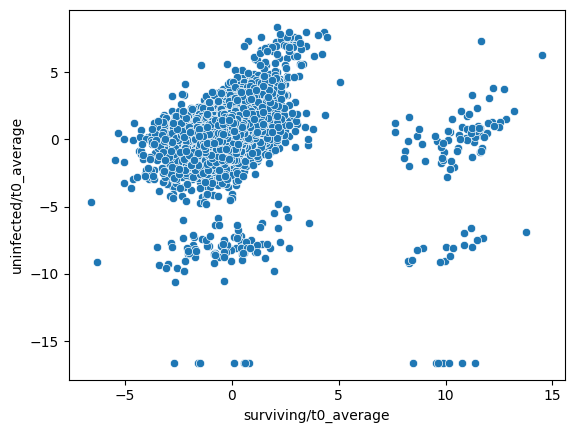

In [176]:
sns.scatterplot(data=crispri_df, x="surviving/t0_average", y="uninfected/t0_average")